In [ ]:
!pip install TensorFlow

informe sua ação: amzn


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


220/220 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.1028
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


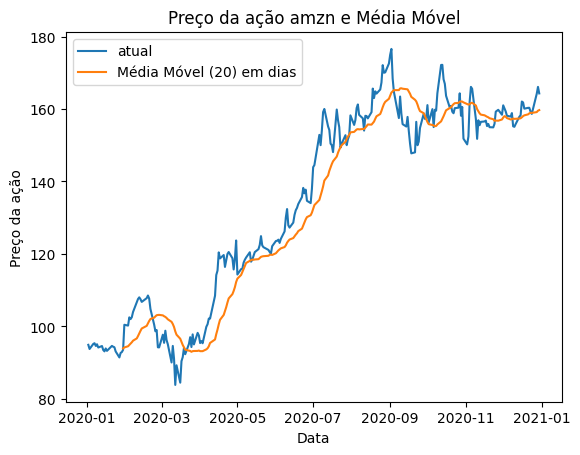

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def baixar_dados(acao, data_inicio, data_fim):
    dados_acao = yf.download(acao, start=data_inicio, end=data_fim)
    return dados_acao

def modelo_media_movel(dados, tamanho_janela):
  dados['Média Móvel'] = dados['Close'].rolling(window=tamanho_janela).mean()
  return dados

acao = input('informe sua ação: ')
data_inicio = '2020-01-01'
data_fim = '2020-12-31'
tamanho_janela = 20

dados = baixar_dados(acao, data_inicio, data_fim)
dados = modelo_media_movel(dados, tamanho_janela)


#Pré-processamento de Dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dados['Close'].values.reshape(-1, 1))

training_data_len = int(np.ceil(len(scaled_data) * 0.95))
train_data = scaled_data[0:int(training_data_len), :]

#Divisao dos dados
x_train, y_train = [], []
for i in range(tamanho_janela, len(train_data)):
  x_train.append(train_data[i-tamanho_janela:i, 0])
  y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#Construcao do modelo
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=25))

model.compile(optimizer='adam', loss='mean_squared_error')

#Treinamento do modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

#teste de predicao

predictions = model.predict(x_train)
predictions = scaler.inverse_transform(predictions)
return predictions


plt.plot(dados['Close'], label='atual')
plt.plot(dados['Média Móvel'], label=f'Média Móvel ({tamanho_janela}) em dias')
plt.title(f'Preço da ação {acao} e Média Móvel')
plt.xlabel('Data')
plt.ylabel('Preço da ação')
plt.legend()
plt.show()

informe sua ação: amzn


[*********************100%***********************]  1 of 1 completed


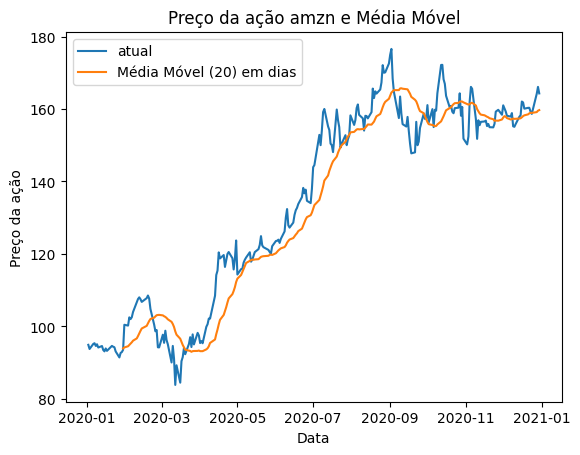

In [ ]:
def baixar_dados(acao, data_inicio, data_fim):
    dados_acao = yf.download(acao, start=data_inicio, end=data_fim)
    return dados_acao

def modelo_media_movel(dados, tamanho_janela):
  dados['Média Móvel'] = dados['Close'].rolling(window=tamanho_janela).mean()
  return dados

acao = input('informe sua ação: ')
data_inicio = '2020-01-01'
data_fim = '2020-12-31'
tamanho_janela = 20

dados = baixar_dados(acao, data_inicio, data_fim)
dados = modelo_media_movel(dados, tamanho_janela)

model.fit(x_train, y_train, batch_size=1, epochs=1)

plt.plot(dados['Close'], label='atual')
plt.plot(dados['Média Móvel'], label=f'Média Móvel ({tamanho_janela}) em dias')
plt.title(f'Preço da ação {acao} e Média Móvel')
plt.xlabel('Data')
plt.ylabel('Preço da ação')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def baixar_dados(acao, data_inicio, data_fim):
    """Baixa dados históricos da ação especificada."""
    return yf.download(acao, start=data_inicio, end=data_fim)

def calcular_media_movel(dados, tamanho_janela):
    """Calcula a média móvel para uma janela de tempo especificada."""
    dados['Média Móvel'] = dados['Close'].rolling(window=tamanho_janela).mean()
    return dados

def preprocessar_dados(dados, tamanho_janela, split_ratio=0.95):
    """Escalona os dados e prepara o conjunto de treinamento e teste."""
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dados['Close'].values.reshape(-1, 1))

    # Divisão de dados em treinamento e teste
    training_data_len = int(len(scaled_data) * split_ratio)
    train_data = scaled_data[:training_data_len]

    # Criação das sequências de entrada e saída para o modelo
    x_train, y_train = [], []
    for i in range(tamanho_janela, len(train_data)):
        x_train.append(train_data[i-tamanho_janela:i, 0])
        y_train.append(train_data[i, 0])

    # Transformação para o formato necessário para o LSTM
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    return x_train, y_train, scaled_data, scaler, training_data_len

def construir_modelo(input_shape):
    """Cria e compila o modelo LSTM."""
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def prever(model, scaled_data, tamanho_janela, training_data_len, scaler):
    """Usa o modelo treinado para prever os preços de fechamento."""
    test_data = scaled_data[training_data_len - tamanho_janela:]
    x_test = [test_data[i-tamanho_janela:i, 0] for i in range(tamanho_janela, len(test_data))]
    x_test = np.array(x_test).reshape(-1, tamanho_janela, 1)

    # Fazendo previsões e desescalonando
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    return predictions

def visualizar(dados, training_data_len, predictions):
    """Visualiza o preço de fechamento real e as previsões do modelo."""
    train = dados[:training_data_len]
    valid = dados[training_data_len:]
    valid['Predictions'] = predictions

    plt.figure(figsize=(8, 4))
    plt.title('Previsão do preço de fechamento da ação')
    plt.xlabel('Data')
    plt.ylabel('Preço da ação')
    plt.plot(train['Close'], label='Treinamento')
    plt.plot(valid['Close'], label='Valor Real')
    plt.plot(valid['Predictions'], label='Previsões')
    plt.legend(loc='upper right')
    plt.show()


acao = input('Informe o código da ação: ')
data_inicio = '2020-01-01'
data_fim = '2020-12-31'
tamanho_janela = 20

dados = baixar_dados(acao, data_inicio, data_fim)
dados = calcular_media_movel(dados, tamanho_janela)
x_train, y_train, scaled_data, scaler, training_data_len = preprocessar_dados(dados, tamanho_janela)

model = construir_modelo((x_train.shape[1], 1))
model.fit(x_train, y_train, batch_size=1, epochs=1)

predictions = prever(model, scaled_data, tamanho_janela, training_data_len, scaler)
visualizar(dados, training_data_len, predictions)


Informe o código da ação: amzn


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


<ipython-input-2-e9a070beb586>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


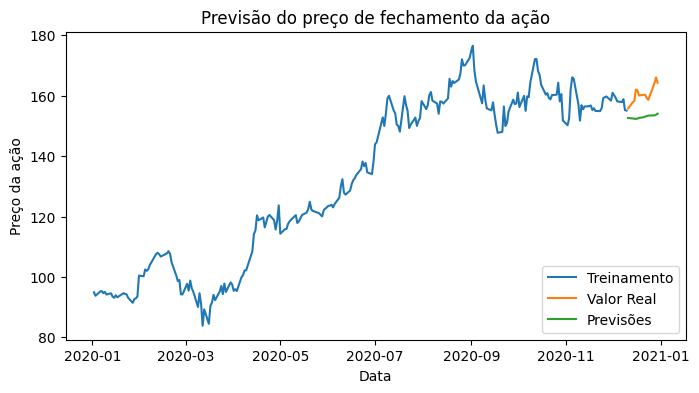

In [ ]:
acao = input('Informe o código da ação: ')
data_inicio = '2020-01-01'
data_fim = '2020-12-31'
tamanho_janela = 20

dados = baixar_dados(acao, data_inicio, data_fim)
dados = calcular_media_movel(dados, tamanho_janela)
x_train, y_train, scaled_data, scaler, training_data_len = preprocessar_dados(dados, tamanho_janela)

model = construir_modelo((x_train.shape[1], 1))
model.fit(x_train, y_train, batch_size=1, epochs=1)

predictions = prever(model, scaled_data, tamanho_janela, training_data_len, scaler)
visualizar(dados, training_data_len, predictions)